<a href="https://colab.research.google.com/github/GuillaumeMagnette/Stage_Tritons/blob/master/Image_processing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import urllib
#!pip install skimage
#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#!git clone https://github.com/GuillaumeMagnette/Stage_Tritons.git


try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow.keras import backend
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras import Sequential
mpl.rcParams['figure.figsize'] = (12, 5)

AUTOTUNE = tf.data.experimental.AUTOTUNE


import IPython.display as display
from PIL import Image
import os
import pathlib
import shutil
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

In [145]:
from google.colab import drive
!rm -rf /content/content
drive.mount('/content/drive')
#!cp '/content/drive/My Drive/slim.zip' slim.zip
!unzip -q /content/drive/"My Drive"/Stage/Stage_Dataset.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

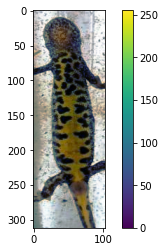

In [0]:
def get_image(image_path):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  mask = np.zeros(img.shape[:2],np.uint8)
  img0 = cv2.equalizeHist(img[:,:,0])
  img1 = cv2.equalizeHist(img[:,:,1])
  img2 = cv2.equalizeHist(img[:,:,2])
  img[:,:,0] = img0
  img[:,:,1] = img1
  img[:,:,2] = img2

  bgdModel = np.zeros((1,65),np.float64)
  fgdModel = np.zeros((1,65),np.float64)

  plt.imshow(img)
  plt.colorbar()
  plt.show()

  return img


img_path = '/content/content/Stage/database/Bascha_P01_T01_K04_F_Adult_4173_20190330031615.jpg'
img = get_image(img_path)
rect = (10,0,80,310)

In [0]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_cut = img*mask2[:,:,np.newaxis]


plt.imshow(img_cut)
plt.colorbar()
plt.show()

ValueError: ignored

In [0]:
img = cv2.imread('/content/content/Stage/database/Bascha_P01_T01_K03_M_Adult_4414_20190321010103.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (1,0,52,200)

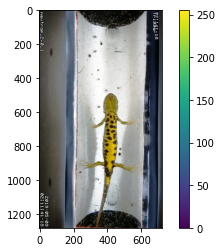

In [0]:
img = cv2.imread('/content/content/Stage/database/Bascha_P01_T01_K04_F_Adult_4240_20190330204648.jpg')
img = cv2.imread('/content/content/Stage/database/Bascha_P01_T02_K05_F_Adult_4706_20190317135353.jpg')
img = cv2.imread('/content/content/Stage/database/Bascha_P01_T01_K10_M_20190509021141-18.jpg')
img = cv2.imread('/content/content/Stage/database/Bascha_P01_T01_K14_M_Adult_1039_20190607040030.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img0 = cv2.equalizeHist(img[:,:,0])
img1 = cv2.equalizeHist(img[:,:,1])
img2 = cv2.equalizeHist(img[:,:,2])
img[:,:,0] = img0
img[:,:,1] = img1
img[:,:,2] = img2

plt.imshow(img)
plt.colorbar()
plt.show()

taille = 50
mask = np.zeros(img.shape[:2],np.uint8)
#mask[int(mask.shape[0]/2)-taille:int(mask.shape[0]/2)+taille,int(mask.shape[1]/2)-taille:int(mask.shape[1]/2)+taille] = 1
#print(mask)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (300,400,300,600)

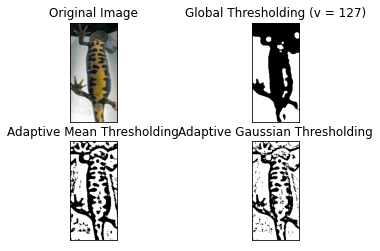

In [0]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = cv2.medianBlur(img_gray,7)
ret,th1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2,)
th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76

[[236 236 234]
 [ 77  73  55]
 [191 192 187]
 [ 24  22  15]
 [134 135 121]]
(22248, 1)
(216, 103, 3)


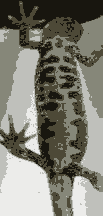

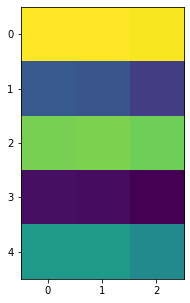

In [0]:
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 4, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
print(center)
plt.imshow(center)

print(label.shape)
#for i in range(len(label)):
 # print(label[i])

print(img.shape)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)
cv2_imshow(res2)

res2_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#img_gray = cv2.medianBlur(img_gray,5)

In [0]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage import filters
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from cv2 import saliency
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

In [0]:

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))



#counts = Counter(labels)

def get_colors(image, nbr_colors, show_chart = True):
  img_flatten = img.reshape(img.shape[0]*img.shape[1], 3)

  clf = KMeans(n_clusters = nbr_colors)
  labels = clf.fit_predict(img_flatten)

  center_colors = clf.cluster_centers_
#img_modified = color.label2rgb(image_slic, image, kind='avg')

  print(center_colors.shape)
  plt.figure()
#plt.imshow(img_modified)

  counts = Counter(labels)

# We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  print(ordered_colors)
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  print(hex_colors)
  rgb_colors = [ordered_colors[i] for i in counts.keys()]
  print(rgb_colors)

  if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

  return rgb_colors

In [0]:
COLORS = {
    'ORANGE': [0, 128, 0],
    'BLACK': [30, 30, 30],
}

print(COLORS.get('BLACK'))
def extract_color(color,image):
  
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

IndentationError: ignored

In [0]:
lower_yellow = np.array([15,0,100]) 
upper_yellow = np.array([60,255,250]) 

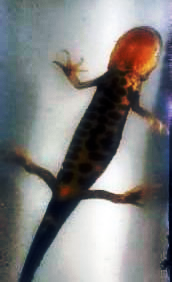

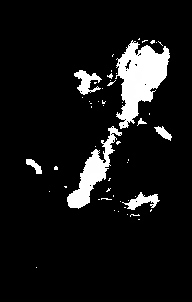

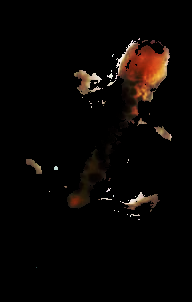

In [359]:

img_path = '/content/content/Stage/database/Bascha_P01_T01_K04_F_Adult_4173_20190330031615.jpg'
img_path = '/content/content/Stage/database/Bascha_P01_T01_K03_M_Adult_4342_20190320161800.jpg'
img_path = '/content/content/Stage/database/Bascha_P01_T01_K03_M_Adult_4363_20190320183318.jpg'
img_path = '/content/content/Stage/database/Bascha_P01_T01_K14_M_Adult_1024_20190605213228.jpg'
img_path = '/content/content/Stage/database/Bascha_P01_T01_K03_M_Adult_5242_20190321032200.jpg'
img_path = '/content/content/Stage/database/Bascha_P01_T01_K03_F_Adult_4274_20190319211855.jpg'
img_path = '/content/content/Stage/database/Bascha_P01_T01_K14_M_Adult_1039_20190607040030.jpg'
img_path = '/content/content/Stage/database/Bascha_P01_T01_K14_M_Adult_1039_20190607040030.jpg'
#img_path = '/content/content/Stage/database/Bascha_P01_T05_K20_U_Larva_8359_20190717223645.jpg'
#img_path = '/content/content/Stage/database/Bascha_P01_T05_K18_M_Adult_6164_20190703234211.jpg'
#img_path = '/content/content/Stage/database/Bascha_P01_T01_K03_F_Adult_4331_20190320100505.jpg'
#img_path = '/content/content/Stage/database/Bascha_P01_T01_K03_M_Adult_4293_20190320005553.jpg'
#img_path = '/content/content/Stage/database/Bascha_P01_T02_K19_U_Juvenile_8829_20190717033259.jpg'

img = cv2.imread(img_path)

img0 = cv2.equalizeHist(img[:,:,0])
img1 = cv2.equalizeHist(img[:,:,1])
img2 = cv2.equalizeHist(img[:,:,2])
img[:,:,0] = img0
img[:,:,1] = img1
img[:,:,2] = img2


cv2_imshow(img)

h,w=img.shape[0:2]

base_size=h+20,w+20,3
# make a 3 channel image for base which is slightly larger than target img
base=np.zeros(base_size,dtype=np.uint8)
cv2.rectangle(base,(0,0),(w+20,h+20),(255,255,255),30) # really thick white rectangle
base[10:h+10,10:w+10]=img # this works
img = base


hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS) 
lower_yellow = np.array([5,15,55]) 
upper_yellow = np.array([90,240,255]) 

lower_yellow2 = np.array([160,15,55]) 
upper_yellow2 = np.array([180,240,255]) 
#hsl(63, 20%, 81%)
lower_black = np.array([0,0,75]) 
upper_black = np.array([35,50,255]) 

lower_black2 = np.array([155,0,75]) 
upper_black2 = np.array([180,50,255]) 
# Here we are defining range of yellow color in HSL 
# This creates a mask of yellow coloured  
# objects found in the frame. 
mask = cv2.inRange(hls, lower_yellow, upper_yellow)
mask2 = cv2.inRange(hls, lower_yellow2, upper_yellow2)
mask_b = cv2.inRange(hls, lower_black, upper_black) 
mask_b2 = cv2.inRange(hls, lower_black2, upper_black2)

mask = mask_b2+mask_b+mask+mask2
# The bitwise and of the frame and mask is done so  
# that only the blue coloured objects are highlighted  
# and stored in res 
#res = cv2.bitwise_or()
res = cv2.bitwise_and(img,img, mask= mask) 
#cv2_imshow(img) 
cv2_imshow(mask)
cv2_imshow(res) 



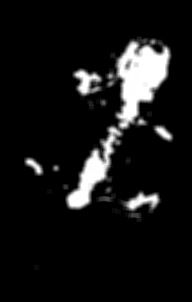

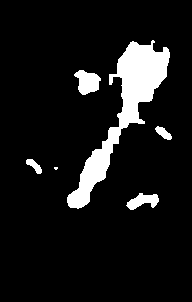

In [360]:
mask_blur = cv2.GaussianBlur(mask,(5,5),cv2.BORDER_DEFAULT)

threshMap = cv2.threshold(mask_blur.astype("uint8"), 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

kernel = np.ones((7,7),np.uint8)
threshMap = cv2.dilate(threshMap, kernel)
threshMap = cv2.erode(threshMap, kernel)


cv2_imshow(mask_blur)
cv2_imshow(threshMap)

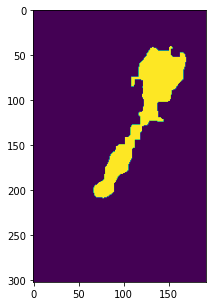

In [361]:
import skimage
from skimage import measure

# Extract the greatest region 

labels_mask = measure.label(threshMap)                       
regions = measure.regionprops(labels_mask)
regions.sort(key=lambda x: x.area, reverse=True)
if len(regions) > 1:
    for rg in regions[1:]:
        labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0
labels_mask[labels_mask!=0] = 1
mask = labels_mask
plt.imshow(mask)

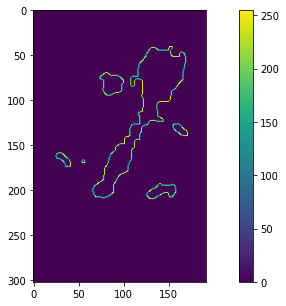

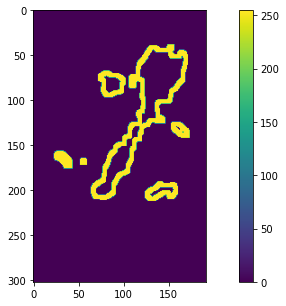

shape of cnt: (203, 1, 2)


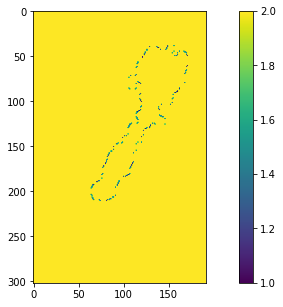

5697.0


In [362]:
canny_output = auto_canny(threshMap, sigma = 0.3)
#canny_output = cv2.convertScaleAbs(canny_output)
kernel = np.ones((5,5),np.uint8)
threshed = cv2.dilate(canny_output,kernel)


#print(canny_output[1])
plt.imshow(canny_output)
plt.colorbar()
plt.show()


## findContours(查找轮廓)
cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]

#print(cnts[0])
plt.imshow(threshed)
plt.colorbar()
plt.show()
#print(cnts.shape)

#new,contours, hierarchy = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours= sorted(contours, key = cv2.contourArea, reverse = True)[:4]
#c=contours[0]
#print(cv2.contourArea(c))
#final = cv2.drawContours(img, [c], -1, (255,0, 0), 3)


#cnts = canny_output
#cnts = sorted(canny_output, key=cv2.contourArea)
## sorted by area(按照面积排序)
cnts = sorted(cnts, key=cv2.contourArea)

## get the maximum's boundinRect(获取最大边缘的外接矩形)
cnt = cnts[-1]

## create mask(创建掩模)
mask = np.ones_like(threshMap, np.uint8)*cv2.GC_PR_BGD
cv2.drawContours(mask, cnt, -1, cv2.GC_FGD, -1)

print("shape of cnt: {}".format(cnt.shape))

plt.imshow(mask)
plt.colorbar()
plt.show()

#new_image = cv2.bitwise_and(img,img,mask=mask)
#print(mask)
new_image = threshMap.copy()
new_image[mask == 2] = 0  # Set values not masked to be 0

#plt.imshow(new_image)
#plt.colorbar()
#plt.show()

retval = cv2.contourArea(cnt)
print(retval)


((120.5161361694336, 111.04261779785156), (50.89509582519531, 197.33888244628906), 25.69585609436035)


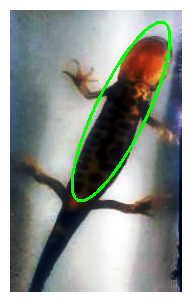

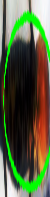

In [357]:
elps = cv2.fitEllipse(cnt)
print(elps)
final = cv2.ellipse(img,elps,(0,255,0),2)
#final = cv2.drawContours(img, [elps], -1, (255,0, 0), 3)
cv2_imshow(final)

width = int(rect[1][0])
height = int(elps[1][1])

src_pts = box.astype("float32")
dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
warped = cv2.warpPerspective(img, M, (width, height))

cv2_imshow(warped)

rect: ((113.76461791992188, 124.58306884765625), (192.66448974609375, 58.52105712890625), -64.44003295898438)


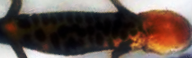

In [363]:

rect = cv2.minAreaRect(cnt)
print("rect: {}".format(rect))

box = cv2.boxPoints(rect)
box = np.int0(box)

width = int(rect[1][0])
height = int(rect[1][1])

src_pts = box.astype("float32")
dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")
M = cv2.getPerspectiveTransform(src_pts, dst_pts)
warped = cv2.warpPerspective(img, M, (width, height))

cv2_imshow(warped)

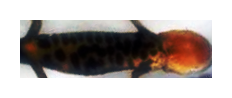

In [378]:
h,w=warped.shape[0:2]

shift = 20
base_size=h+2*shift,w+2*shift,3
# make a 3 channel image for base which is slightly larger than target img
base=np.zeros(base_size,dtype=np.uint8)
cv2.rectangle(base,(0,0),(w+2*shift,h+2*shift),(255,255,255),40) # really thick white rectangle
base[shift:h+shift,shift:w+shift]=warped # this works
img = base
cv2_imshow(img)

h,w=img.shape[0:2]

In [398]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[0] + radius[0]*np.cos(radians)#polar co-ordinates
    r = center[1] + radius[1]*np.sin(radians)
    
    return np.array([c, r]).T


# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [h/2,w/2], [h/2,w/2])[:-1]
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
snake = seg.active_contour(img, points,alpha = 0.005, beta=0.1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  from ipykernel import kernelapp as app


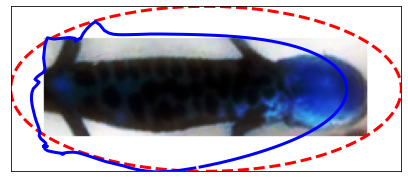

In [399]:

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(points[:, 1], points[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


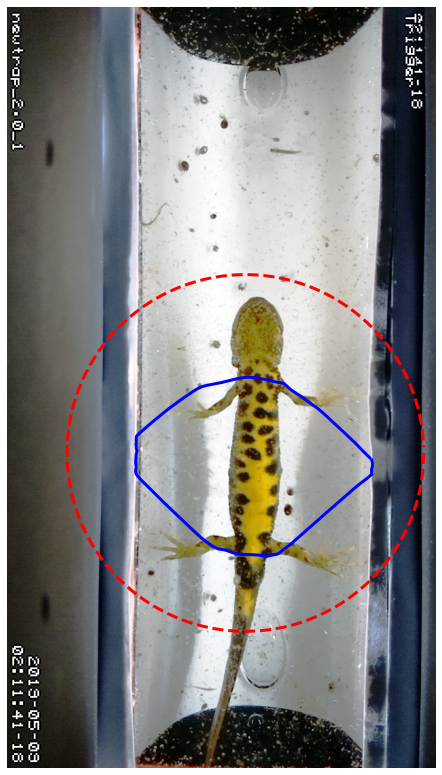

In [0]:

ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

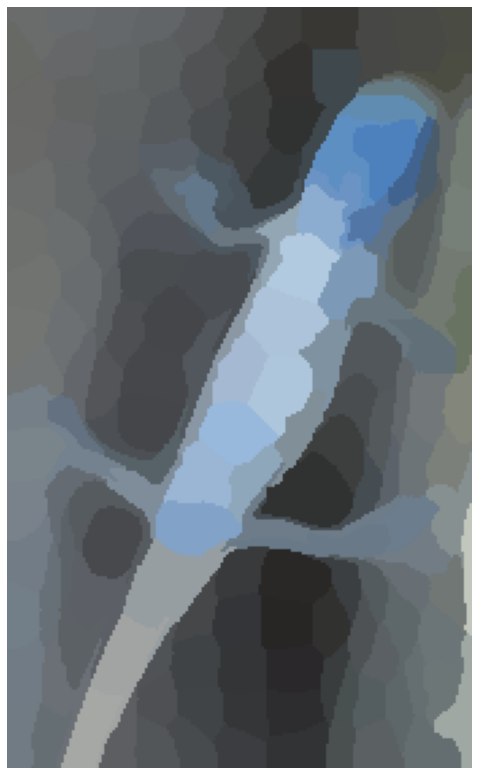

In [0]:
image_slic = seg.slic(dst,n_segments=200)
# label2rgb replaces each discrete label with the average interior color
image_show((color.label2rgb(image_slic, image, kind='avg')* 255).astype("uint8"));

In [0]:
hls = cv2.cvtColor(warped, cv2.COLOR_BGR2HLS) 
lower_yellow = np.array([10,15,97]) 
upper_yellow = np.array([40,145,255]) 

lower_black = np.array([0,0,30]) 
upper_black = np.array([25,35,255]) 

lower_black2 = np.array([160,0,30]) 
upper_black2 = np.array([180,35,255]) 

rectangle: [0, 0, 192.66448974609375, 58.52105712890625]
center: [29, 96]


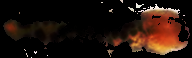

In [316]:
rectangle = [0,0,rect[1][0],rect[1][1]]
print("rectangle: {}".format(rectangle))

center = [box[0][0]+box[1][0]+box[2][0]+box[3][0],box[0][1]+box[1][1]+box[2][1]+box[3][1]]
center[0] = int(warped.shape[0]/2)
center[1] = int(warped.shape[1]/2)
print("center: {}".format(center))
#mask = np.ones_like(warped[:,:,0], np.uint8)*cv2.GC_PR_BGD

#hls = cv2.cvtColor(warped, cv2.COLOR_RGB2HLS) 



hls = cv2.cvtColor(warped, cv2.COLOR_BGR2HLS) 

# Here we are defining range of yellow color in HSL 
# This creates a mask of yellow coloured  
# objects found in the frame. 
mask = cv2.inRange(hls, lower_yellow, upper_yellow)
mask2 = cv2.inRange(hls, lower_yellow2, upper_yellow2)  
mask_b = cv2.inRange(hls, lower_black, upper_black) 
mask_b2 = cv2.inRange(hls, lower_black2, upper_black2)

mask_total = mask_b2+mask_b+mask+mask2
# The bitwise and of the frame and mask is done so  
# that only the blue coloured objects are highlighted  
# and stored in res 
#res = cv2.bitwise_or()
#res = cv2.bitwise_and(img,img, mask= mask) 
# Here we are defining range of yellow color in HSL 
# This creates a mask of yellow coloured  
# objects found in the frame. 
#extracted = cv2.inRange(hls, lower_yellow, upper_yellow) 
mask = np.ones_like(warped[:,:,0], np.uint8)
mask[mask_total == 0] = 0
mask[mask_total == 255] = 1
#mask[center[1]-10:center[1]+10,center[0]-10:center[0]+10]=1
#print(mask[center[1],center[0]])
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
#cv2_imshow(mask)
cv2.grabCut(warped,mask,rectangle,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_MASK)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_cut = warped*mask2[:,:,np.newaxis]

cv2_imshow(img_cut)

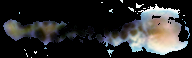

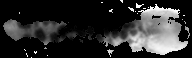

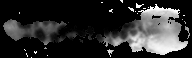

In [317]:
img0 = cv2.equalizeHist(img_cut[:,:,0])
img1 = cv2.equalizeHist(img_cut[:,:,1])
img2 = cv2.equalizeHist(img_cut[:,:,2])
img_cut[:,:,0] = img0
img_cut[:,:,1] = img1
img_cut[:,:,2] = img2

cv2_imshow(img_cut)

img2_gray = cv2.cvtColor(img_cut, cv2.COLOR_BGR2GRAY)
cv2_imshow(img2_gray)

img2_gray = cv2.equalizeHist(img2_gray[:,:])
cv2_imshow(img2_gray)

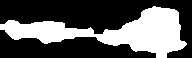

In [318]:
#mask_blur = cv2.GaussianBlur(img2_gray,(5,5),cv2.BORDER_DEFAULT)
img_gray = cv2.medianBlur(img2_gray,7)
ret,threshMap = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY)

#threshMap = cv2.threshold(img2_gray.astype("uint8"), 0, 255,
	#cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

kernel = np.ones((5,5),np.uint8)
kernel = np.ones((9,9),np.uint8)
#threshMap = cv2.erode(threshMap, kernel)
threshMap = cv2.dilate(threshMap, kernel)
threshMap = cv2.erode(threshMap, kernel)

#cv2_imshow(mask_blur)
cv2_imshow(threshMap)

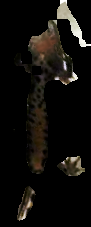

In [301]:
mask = np.ones_like(warped[:,:,0], np.uint8)
mask[threshMap == 0] = 0
mask[threshMap == 255] = 1

img_cut = warped*mask[:,:,np.newaxis]

cv2_imshow(img_cut)



rect: ((95.5, 94.0), (188.0, 191.0), -90.0)
[[191 188]
 [  0 188]
 [  0   0]
 [191   0]]


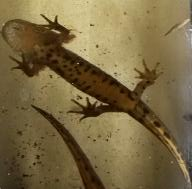

In [0]:
# 用红色表示有旋转角度的矩形框架

rect = cv2.minAreaRect(cnt)
print("rect: {}".format(rect))

box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)
#cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
#cv2.imwrite('contours.png', img)
cv2_imshow(img)
#cv2_imshow(box)



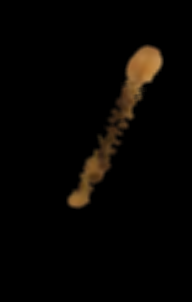

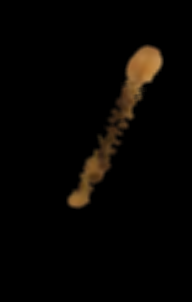

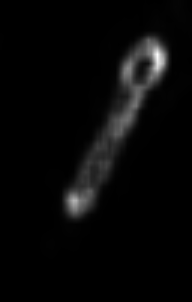

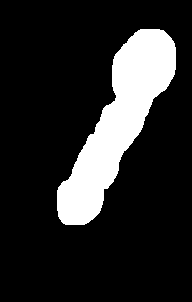

In [214]:
# apply guassian blur on src image
dst = cv2.GaussianBlur(res,(5,5),cv2.BORDER_DEFAULT)
cv2_imshow(dst)

saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
#img = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
(success, saliencyMap) = saliency.computeSaliency(dst)
saliencyMap = (saliencyMap * 255).astype("uint8")


threshMap = cv2.threshold(saliencyMap.astype("uint8"), 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
	

kernel = np.ones((15,15),np.uint8)
threshMap = cv2.dilate(threshMap, kernel)


cv2_imshow(dst)
cv2_imshow(saliencyMap)
cv2_imshow(threshMap)

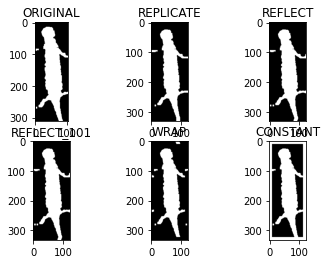

In [44]:
BLUE = [255,0,0]
img1 = threshMap
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

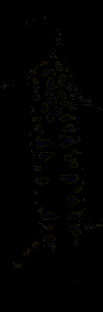

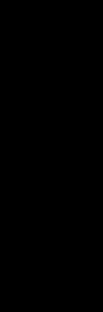

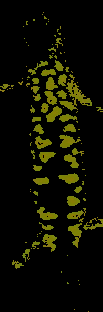

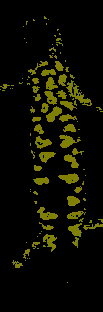

In [0]:


#bright = get_image(img_path)
bright = cv2.cvtColor( img, cv2.COLOR_RGB2BGR)
bgr = [15, 15, 15]
thresh = 15
minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])
 
maskBGR = cv2.inRange(bright,minBGR,maxBGR)
resultBGR = cv2.bitwise_and(bright, bright, mask = maskBGR)


 

#convert 1D array to 3D, then convert it to HSV and take the first element
# this will be same as shown in the above figure [65, 229, 158]

brightHSV = cv2.cvtColor( bright, cv2.COLOR_BGR2HSV)
hsv = cv2.cvtColor( np.uint8([[bgr]] ), cv2.COLOR_BGR2HSV)[0][0]
 
minHSV = np.array([hsv[0] - thresh, hsv[1] - thresh, hsv[2] - thresh])
maxHSV = np.array([hsv[0] + thresh, hsv[1] + thresh, hsv[2] + thresh])

 

maskHSV = cv2.inRange(brightHSV, minHSV, maxHSV)
resultHSV = cv2.bitwise_and(brightHSV, brightHSV, mask = maskHSV)

 
#convert 1D array to 3D, then convert it to YCrCb and take the first element

brightYCB = cv2.cvtColor( bright, cv2.COLOR_BGR2YCrCb)
ycb = cv2.cvtColor( np.uint8([[bgr]] ), cv2.COLOR_BGR2YCrCb)[0][0]

 
minYCB = np.array([ycb[0] - thresh, ycb[1] - thresh, ycb[2] - thresh])
maxYCB = np.array([ycb[0] + thresh, ycb[1] + thresh, ycb[2] + thresh])

 
maskYCB = cv2.inRange(brightYCB, minYCB, maxYCB)
resultYCB = cv2.bitwise_and(brightYCB, brightYCB, mask = maskYCB)

#convert 1D array to 3D, then convert it to LAB and take the first element
brightLAB = cv2.cvtColor( bright, cv2.COLOR_BGR2LAB)
lab = cv2.cvtColor( np.uint8([[bgr]] ), cv2.COLOR_BGR2LAB)[0][0]

 
minLAB = np.array([lab[0] - thresh, lab[1] - thresh, lab[2] - thresh])
maxLAB = np.array([lab[0] + thresh, lab[1] + thresh, lab[2] + thresh])
 
maskLAB = cv2.inRange(brightLAB, minLAB, maxLAB)
resultLAB = cv2.bitwise_and(brightLAB, brightLAB, mask = maskLAB)

 

cv2_imshow(resultBGR)
cv2_imshow(resultHSV)
cv2_imshow(resultYCB)
cv2_imshow(resultLAB)


In [0]:
cv2_imshow(img_gray)

img_gray_equalized = cv2.equalizeHist(img_gray)
cv2_imshow(img_gray_equalized)

hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
plt.hist(img_gray.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()


hist = cv2.calcHist([img_gray_equalized],[0],None,[256],[0,256])
plt.hist(img_gray_equalized.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

threshed = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,5,2)

NameError: ignored

In [0]:
## threshed(阈值化)
#th, threshed = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#threshed = cv2.erode(threshed,kernel)


canny_output = auto_canny(img_gray_equalized, sigma = 0.3)
canny_output = cv2.convertScaleAbs(canny_output)
kernel = np.ones((3,3),np.uint8)
threshed = cv2.dilate(canny_output,kernel)


#print(canny_output[1])
plt.imshow(canny_output)
plt.colorbar()
plt.show()


## findContours(查找轮廓)
cnts = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]

#print(cnts[0])
plt.imshow(threshed)
plt.colorbar()
plt.show()
#print(cnts.shape)

#new,contours, hierarchy = cv2.findContours(threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours= sorted(contours, key = cv2.contourArea, reverse = True)[:4]
#c=contours[0]
#print(cv2.contourArea(c))
#final = cv2.drawContours(img, [c], -1, (255,0, 0), 3)


#cnts = canny_output
#cnts = sorted(canny_output, key=cv2.contourArea)
## sorted by area(按照面积排序)
cnts = sorted(cnts, key=cv2.contourArea)

## get the maximum's boundinRect(获取最大边缘的外接矩形)
cnt = cnts[-1]
retval = cv2.fitEllipse(cnt)
bbox = x,y,w,h = cv2.boundingRect(cnt)

# 用绿色(0, 255, 0)来画出最小的矩形框架
#x, y, w, h = cv2.boundingRect(cnt)
#cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 用红色表示有旋转角度的矩形框架
#rect = cv2.minAreaRect(cnt)
#box = cv2.boxPoints(rect)
#box = np.int0(box)
#cv2.drawContours(img, [box], 0, (0, 0, 255), 2)
#cv2.imwrite('contours.png', img)

## create mask(创建掩模)
mask = np.ones_like(img_gray, np.uint8)*cv2.GC_PR_BGD
print(mask)
cv2.drawContours(mask, cnts, -1, cv2.GC_FGD, -1)

plt.imshow(mask)
plt.colorbar()
plt.show()

#new_image = cv2.bitwise_and(img,img,mask=mask)
#print(mask)
new_image = img.copy()
new_image[mask == 2] = 0  # Set values not masked to be 0

plt.imshow(new_image)
plt.colorbar()
plt.show()



## 使用 grabcut 分割
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = bbox

cv2.grabCut(new_image, mask, rect, bgdModel, fgdModel, 2, cv2.GC_INIT_WITH_MASK)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_extracted = img*mask2[:,:,np.newaxis]

plt.imshow(img_extracted)
plt.colorbar()
plt.show()

NameError: ignored

In [0]:
retval = cv2.fitEllipse(img_gray)

error: ignored

In [0]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

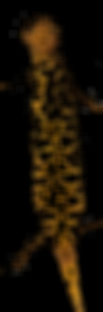

In [0]:
# apply guassian blur on src image
dst = cv2.GaussianBlur(res,(9,9),cv2.BORDER_DEFAULT)
cv2_imshow(dst)

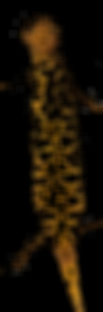

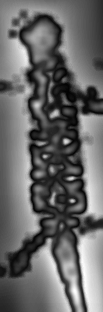

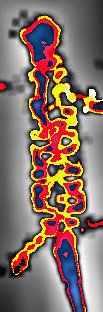

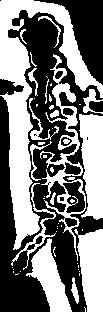

In [0]:
cv2_imshow(dst)
cv2_imshow(saliencyMap[:,:,np.newaxis])
saliencyMapAggr = np.abs(saliencyMap[:,:,np.newaxis] - dst)
cv2_imshow(saliencyMapAggr)
saliencyMapAggrGray = cv2.cvtColor(saliencyMapAggr, cv2.COLOR_RGB2GRAY)

threshMapAggr = cv2.threshold(saliencyMapAggrGray.astype("uint8"), 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


cv2_imshow(threshMapAggr)

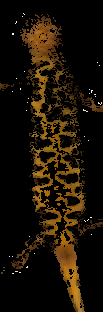

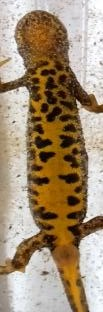

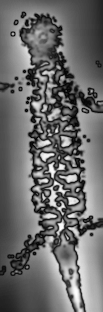

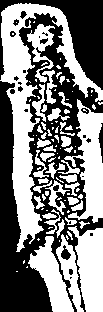

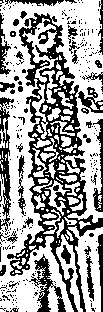

In [0]:
# initialize OpenCV's static fine grained saliency detector and
# compute the saliency map
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_slic = seg.slic(res,n_segments=10000)
# label2rgb replaces each discrete label with the average interior color
img_saliency = color.label2rgb(image_slic, res, kind='avg')
cv2_imshow(img_saliency)
#cv2.image_slic.enforceLabelConnectivity()
#img_saliency = color.label2rgb(image_slic, image, kind='avg')
#cv2_imshow(img_saliency)
#img_saliency = cv2.dilate(img_saliency,kernel)
(success, saliencyMap) = saliency.computeSaliency(img_saliency)
saliencyMap = (saliencyMap * 255).astype("uint8")
# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map
threshMap = cv2.threshold(saliencyMap.astype("uint8"), 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
threshed = cv2.adaptiveThreshold(saliencyMap.astype("uint8"),255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
# show the images
cv2_imshow(img)
cv2_imshow(saliencyMap)
cv2_imshow(threshMap)
cv2_imshow(threshed)

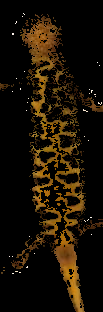

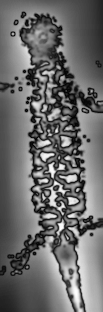

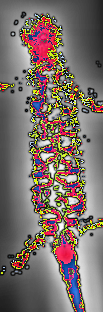

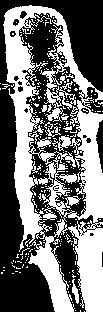

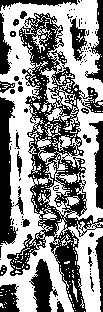

In [0]:
cv2_imshow(res)
cv2_imshow(saliencyMap[:,:,np.newaxis])
saliencyMapAggr = np.abs(saliencyMap[:,:,np.newaxis] - res)
cv2_imshow(saliencyMapAggr)
saliencyMapAggrGray = cv2.cvtColor(saliencyMapAggr, cv2.COLOR_RGB2GRAY)

threshMapAggr = cv2.threshold(saliencyMapAggrGray.astype("uint8"), 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


cv2_imshow(threshMapAggr)

threshed = cv2.adaptiveThreshold(saliencyMapAggrGray.astype("uint8"),255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,21,2)
cv2_imshow(threshed)

In [0]:
#img = cv.imread('noisy2.png',0)
blur = cv2.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.sum()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256): 
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

error: ignored

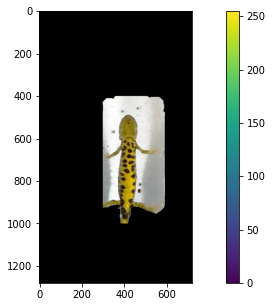

In [0]:
mask, bgdModel, fgdModel = cv2.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

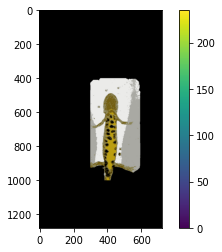

In [0]:
cv2.grabCut(res2,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
res2 = res2*mask2[:,:,np.newaxis]

plt.imshow(res2)
plt.colorbar()
plt.show()

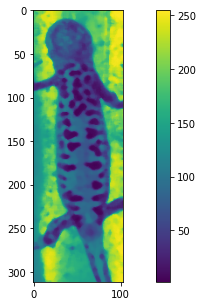

In [0]:
plt.imshow(img_gray)
plt.colorbar()
plt.show()

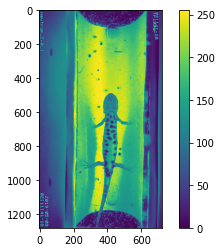

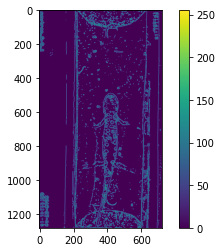

In [0]:
src_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(src_gray)
plt.colorbar()
plt.show()
#canny_output = cv2.Canny(src_gray,250, 250 * 2)
canny_output = auto_canny(src_gray, sigma = 0.1)
plt.imshow(canny_output)
plt.colorbar()
plt.show()
    
contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
# Get the moments
mu = [None]*len(contours)
for i in range(len(contours)):
   mu[i] = cv2.moments(contours[i])

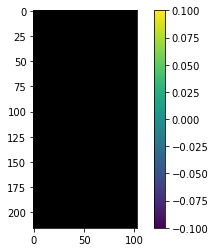

In [0]:
canny_output = cv2.cvtColor(canny_output, cv2.COLOR_RGBA2RGB)
cv2.grabCut(canny_output,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
canny_output = canny_output*mask2[:,:,np.newaxis]

plt.imshow(res2)
plt.colorbar()
plt.show()

In [0]:
print(len(mu))
contours

In [0]:
print(image.shape)

(1280, 720, 3)


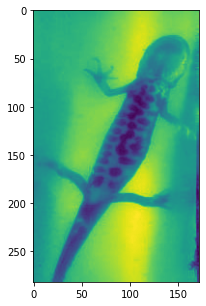

In [0]:
# The I/O module is used for importing the image
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage import filters

image = io.imread('/content/content/Stage/database/Bascha_P01_T01_K14_M_Adult_1039_20190607040030.jpg')
plt.imshow(image);
grayscale = rgb2gray(image)
plt.imshow(grayscale);

In [0]:
grayscale = filters.median(grayscale)

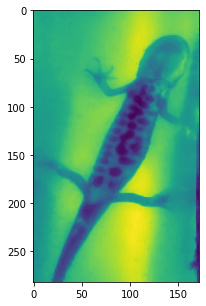

In [0]:
plt.imshow(grayscale);

In [0]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage import filters
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from cv2 import saliency


In [0]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

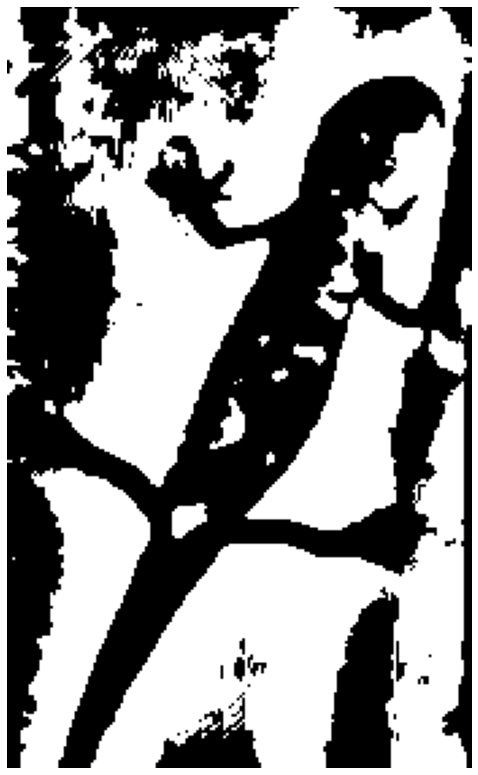

In [0]:
image_threshold = filters.threshold_local(grayscale,block_size=65) 
image_show(grayscale > image_threshold);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


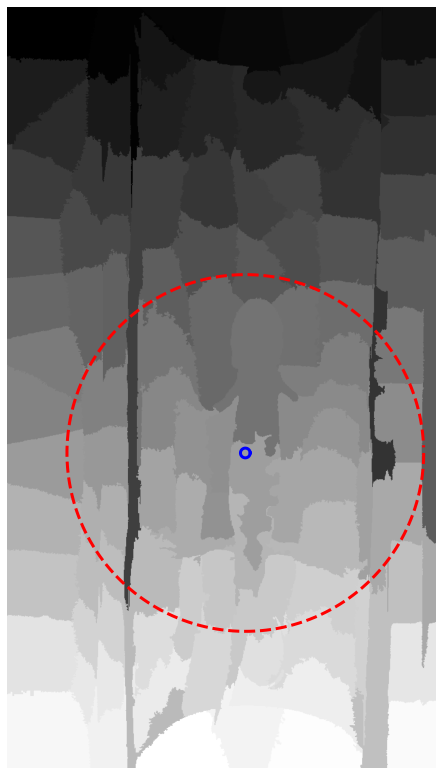

In [0]:
#grayscale_slic = rgb2gray(image_slic)
snake = seg.active_contour(image_slic, points,alpha=0.08)
fig, ax = image_show(image_slic)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [0]:
print(image_slic.shape)
canny_output = cv2.cvtColor(image_slic, cv2.COLOR_RGBA2RGB)
cv2.grabCut(canny_output,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
canny_output = canny_output*mask2[:,:,np.newaxis]

plt.imshow(res2)
plt.colorbar()
plt.show()

(1280, 720)


error: ignored

In [0]:
success

True